## Single Layer Perceptron from scratch (Implementation)
Name: Suyash Chintawar

Roll no: 191IT109

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train'

--2022-08-22 11:16:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3758 (3.7K) [application/x-httpd-php]
Saving to: ‘SPECT.train.1’

SPECT.train.1       100%[===================>]   3.67K  --.-KB/s    in 0s      

2022-08-22 11:16:41 (87.9 MB/s) - ‘SPECT.train.1’ saved [3758/3758]



In [ ]:
features = ['F'+str(i) for i in range(1,23)]
df=pd.read_csv('SPECT.train',header=None, names=['class']+features)
df = df.reindex(columns=features +['class'])
df = df.sample(frac=1,random_state=16).reset_index(drop=True)
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,class
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def initialize():
  w = np.random.rand(1,22)
  b = np.random.rand(1,1)
  return w,b

In [ ]:
def predict(data,w,b):
  y_pred = np.matmul(data,w.T)+b
  y_pred = 1/(1+np.exp(-1*y_pred))
  return y_pred

In [ ]:
def train_perceptron(data,w,b,lr):
  x = data[:,:-1]
  y = data[:,-1:]

  iterations = 10
  for i in range(iterations):
    y_pred = predict(x,w,b)
    w = w + lr * np.matmul(x.T,y-y_pred).T
    b = b + lr * np.sum(y-y_pred)
    
  return w,b

In [ ]:
def evaluate_perceptron(data,w,b):
  x = data[:,:-1]
  y = data[:,-1:]

  y_pred = predict(x,w,b)
  for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
      y_pred[i] = 0
    else:
      y_pred[i] = 1
  accuracy = accuracy_score(y,y_pred)
  cm = confusion_matrix(y,y_pred)
  sn.heatmap(cm,annot=True)
  plt.show()
  return accuracy

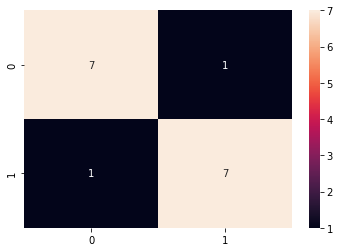

Fold 1 accuracy: 0.875


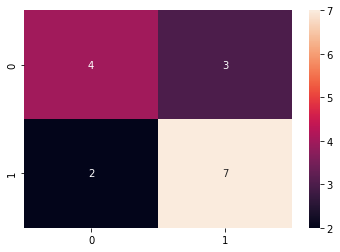

Fold 2 accuracy: 0.6875


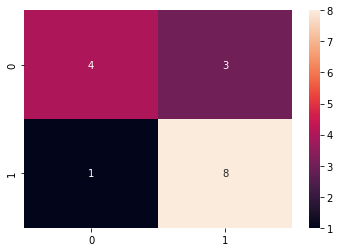

Fold 3 accuracy: 0.75


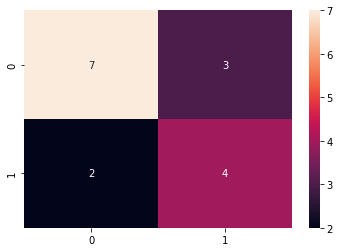

Fold 4 accuracy: 0.6875


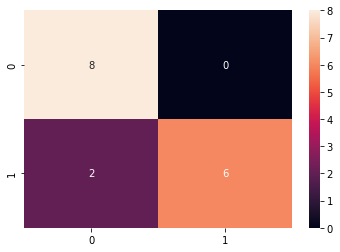

Fold 5 accuracy: 0.875
Mean accuracy: 0.775


In [ ]:
# Learning rate: 0.01

k=5
lr = 0.01
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w,b = initialize()
  w,b = train_perceptron(train,w,b,lr)
  accuracy = evaluate_perceptron(test,w,b)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

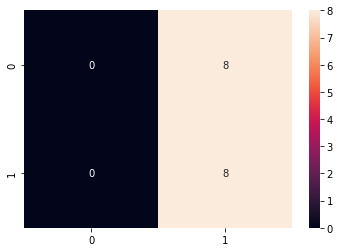

Fold 1 accuracy: 0.5


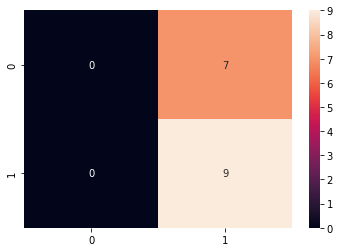

Fold 2 accuracy: 0.5625


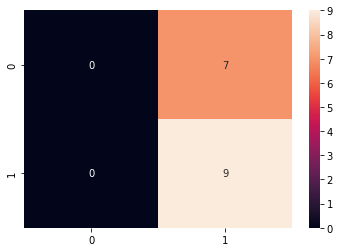

Fold 3 accuracy: 0.5625


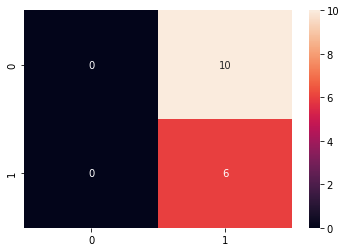

Fold 4 accuracy: 0.375


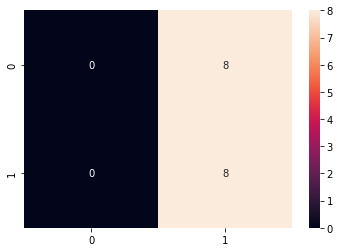

Fold 5 accuracy: 0.5
Mean accuracy: 0.5


In [ ]:
# Learning rate: 0.001

k=5
lr = 0.001
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w,b = initialize()
  w,b = train_perceptron(train,w,b,lr)
  accuracy = evaluate_perceptron(test,w,b)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

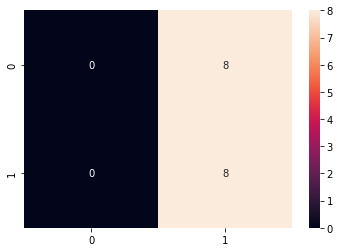

Fold 1 accuracy: 0.5


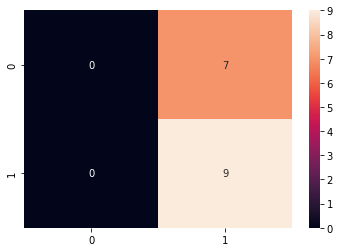

Fold 2 accuracy: 0.5625


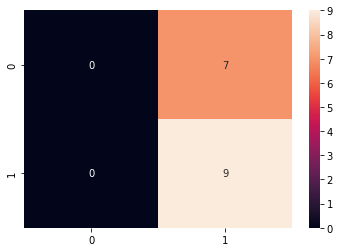

Fold 3 accuracy: 0.5625


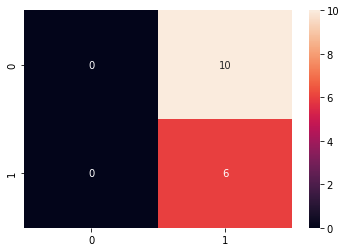

Fold 4 accuracy: 0.375


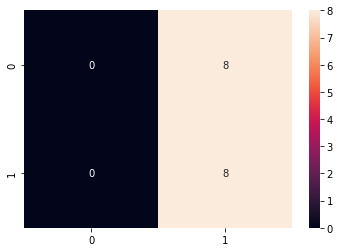

Fold 5 accuracy: 0.5
Mean accuracy: 0.5


In [ ]:
# Learning rate: 0.0001

k=5
lr = 0.0001
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w,b = initialize()
  w,b = train_perceptron(train,w,b,lr)
  accuracy = evaluate_perceptron(test,w,b)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

## Analysis of learning rate:

As the learning rate decreases, the speed of convergence decreases due to which the accuracy decreases. Also the number of datapoints is less the accuracy decreases as learning rate decreases.